# LOAN DATA 2007 - 2014 ID/X Partners

## IMPORT DATASET

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_loan = pd.read_csv('loan_data_2007_2014.csv')

C:\Users\sanny\AppData\Local\Temp\ipykernel_17564\3492898002.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_loan = pd.read_csv('loan_data_2007_2014.csv')


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df_loan.head(3)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## INFORMASI AWAL

### Informasi data awal

In [5]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

#### Temuan

Hasil temuan pada .info di atas, banyak kolom yang sama sekali tidak memiliki nilai (0 non-null). <br>
Saya memutuskan untuk menghapusnya karena memang tidak akan terpakai. kemudian saya menghapus kolom Unnamed: 0 karena itu merupakan kolom nomor tanpa judul dari file CSV

#### Tindakan

In [6]:
# daftar kolom yang akan di hapus
kolom_dihapus = ['Unnamed: 0', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']

# Hapus Kolom pada variabel kolom_dihapus
df_loan.drop(columns=kolom_dihapus, inplace=True)

In [7]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

### Informasi Missing Values

In [8]:
# Hitung jumlah missing values untuk setiap kolom
jumlah_missing = df_loan.isnull().sum()

# Hitung persentase missing values untuk setiap kolom
persentase_missing = round((jumlah_missing / len(df_loan)) * 100, 2)

# Gabungkan hasil dalam satu DataFrame
missing_summary = pd.DataFrame({
    'Jumlah Missing Values': jumlah_missing,
    'Persentase Missing Values (%)': persentase_missing
})

# Filter hanya kolom yang memiliki missing values
missing_summary_filtered = missing_summary[missing_summary['Jumlah Missing Values'] > 0]

print(missing_summary_filtered)

                             Jumlah Missing Values  \
emp_title                                    27588   
emp_length                                   21008   
annual_inc                                       4   
desc                                        340304   
title                                           21   
delinq_2yrs                                     29   
earliest_cr_line                                29   
inq_last_6mths                                  29   
mths_since_last_delinq                      250351   
mths_since_last_record                      403647   
open_acc                                        29   
pub_rec                                         29   
revol_util                                     340   
total_acc                                       29   
last_pymnt_d                                   376   
next_pymnt_d                                227214   
last_credit_pull_d                              42   
collections_12_mths_ex_med  

#### Temuan

Dari 57 Kolom, 22 Kolom memiliki Missing Values (Tidak memiliki Nilai). Bahkan ada 3 kolom yang memiliki Missing Values lebih dari 70%. <br>
Penanganan akan dilakukan nanti pada tahap data preprocessing.

### Deskripsi Singkat

Jumlah kolom yang ada pada dataset adalah 75 kolom dan memiliki 466285 baris data. Saya menemukan bahwa kolom target adalah kolom loan_status (status pinjaman) atau bisa jadi jika jumlah unik valuesnya lebih dari 2 maka akan ditambahkan kolom baru yang menjadi target yang dipisakan antara yang diberi pinjaman (1) dan tidak diberi pinjaman (0) dari kolom loan_status. Dari hasil analis informasi awal, ternyata sejumlah 17 kolom tidak memiliki nilai sama sekali. Maka sudah bisa dipastikan kolom tersebut tidak akan terpakai, saya melakukan tindakan secara langsung dengan menghapus kolom-kolom tersebut. Melihat dari Missing Values juga ternyata ada 3 kolom yang memiliki persentase kehilangan data sebanyak 70%. Hal ini tentunya ada kemungkinan kolom-kolom tersebut akan dihapus.

## STATISTIK DESKRIPTIF

### Memisahkan Kolom Kategorikal dan Numerical

In [9]:
# Memisahkan kolom numerikal dan kategorikal
kolom_numerikal = df_loan.select_dtypes(include=['number']).columns
kolom_kategorikal = df_loan.select_dtypes(include=['object']).columns

print("Kolom Numerikal:", kolom_numerikal)
print("Kolom Kategorikal:", kolom_kategorikal)

Kolom Numerikal: Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim'],
      dtype='object')
Kolom Kategorikal: Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_

### Statistika Deskriptif

In [10]:
pd.set_option('display.float_format', '{:.2f}'.format)

#### Kolom Numerikal

In [11]:
df_loan[kolom_numerikal].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,466285.00,13079729.91,10893711.62,54734.00,3639987.00,10107897.00,20731209.00,38098114.00
member_id,466285.00,14597660.62,11682367.44,70473.00,4379705.00,11941075.00,23001541.00,40860827.00
loan_amnt,466285.00,14317.28,8286.51,500.00,8000.00,12000.00,20000.00,35000.00
funded_amnt,466285.00,14291.80,8274.37,500.00,8000.00,12000.00,20000.00,35000.00
funded_amnt_inv,466285.00,14222.33,8297.64,0.00,8000.00,12000.00,19950.00,35000.00
int_rate,466285.00,13.83,4.36,5.42,10.99,13.66,16.49,26.06
installment,466285.00,432.06,243.49,15.67,256.69,379.89,566.58,1409.99
annual_inc,466281.00,73277.38,54963.57,1896.00,45000.00,63000.00,88960.00,7500000.00
dti,466285.00,17.22,7.85,0.00,11.36,16.87,22.78,39.99
delinq_2yrs,466256.00,0.28,0.80,0.00,0.00,0.00,0.00,29.00


#### Kolom Kategorikal

In [12]:
df_loan[kolom_kategorikal].describe().transpose()

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276


#### Nilai kolom Kategorikal

In [13]:
for col in kolom_kategorikal:
    print(f'''Value count kolom {col}:''')
    print(df_loan[col].value_counts())
    print()

Value count kolom term:
term
 36 months    337953
 60 months    128332
Name: count, dtype: int64

Value count kolom grade:
grade
B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: count, dtype: int64

Value count kolom sub_grade:
sub_grade
B3    31686
B4    30505
C1    26953
C2    26740
B2    26610
C3    25317
B5    25252
C4    24105
B1    22876
C5    22178
A5    21757
D1    19261
A4    19045
D2    17046
D3    14916
D4    14099
A3    12568
D5    11566
A2    10956
A1    10541
E1     9033
E2     8669
E3     6976
E4     5992
E5     5087
F1     3940
F2     3001
F3     2708
F4     2067
F5     1513
G1     1109
G2      823
G3      583
G4      422
G5      385
Name: count, dtype: int64

Value count kolom emp_title:
emp_title
Teacher                              5399
Manager                              4438
Registered Nurse                     2316
RN                                   2204
Supervisor                           1967
                         

## EXPLORATORY DATA ANALISYS (EDA)

### Box Plot

C:\Users\sanny\AppData\Local\Temp\ipykernel_17564\421411488.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanny\AppData\Local\Temp\ipykernel_17564\421411488.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanny\AppData\Local\Temp\ipykernel_17564\421411488.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanny\AppData\Local\Temp\ipykernel_17564\421411488.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanny\AppData\Local\Temp\ipykernel_17564\421411488.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanny\AppData\Local\Temp\ipykernel_17564\421411488.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanny\AppData\Local\Temp\ipykernel_17564\421411488.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanny\AppData\Loca

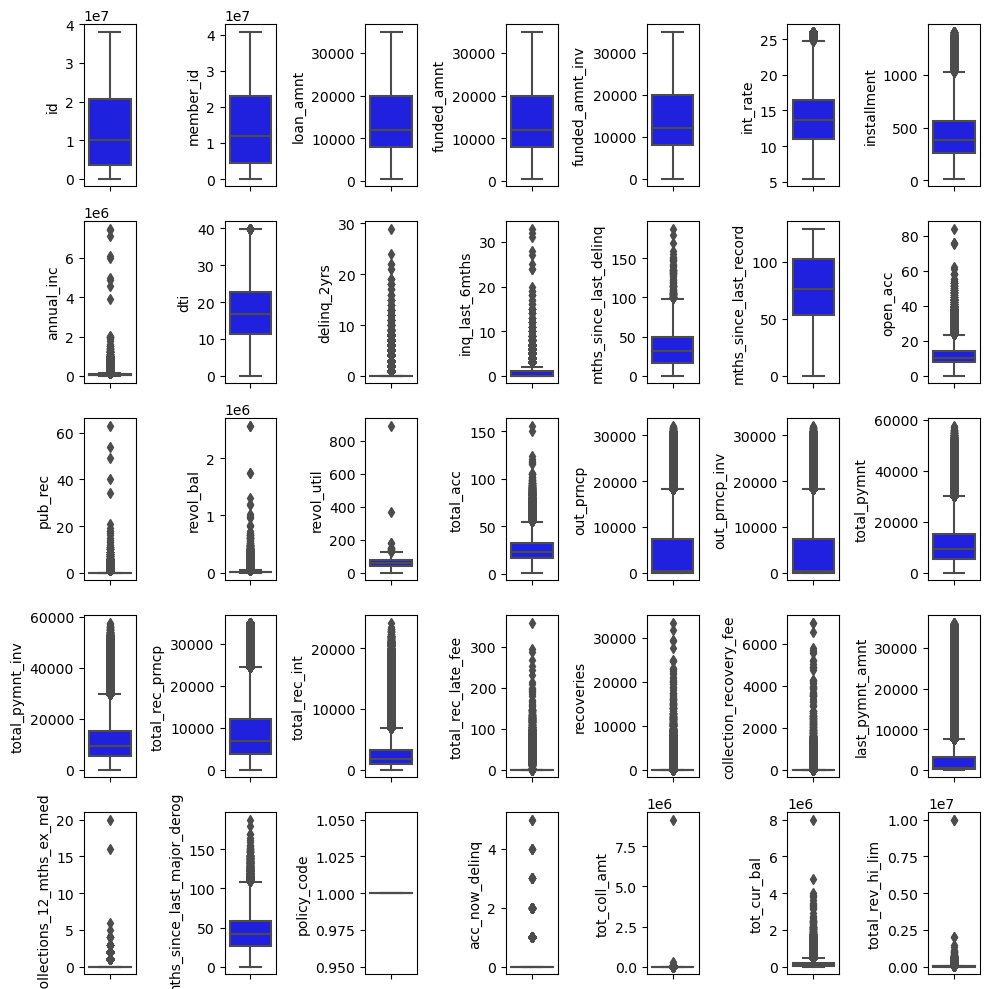

In [14]:
plt.figure(figsize=(10, 10))

for i in range(0, len(kolom_numerikal)):
    plt.subplot(5, 7, i+1)
    sns.boxplot(y=df_loan[kolom_numerikal[i]], color='blue', orient='v')
    plt.tight_layout()

#### Temuan

Banyak sekali Outliers dari tampilan Boxplot di atas. Hanya beberapa kolom saja yang tidak memiliki outliers yang kemungkinan data tersebut berdistribusi normal. policy_code merupakan jumlah nomor emergency polisi, maka hanya memiliki jumlah 1 untuk setiap id.

### Distribution Plot

C:\Users\sanny\AppData\Local\Temp\ipykernel_17564\2002913416.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_loan[kolom_numerikal[i]], color='gray')
C:\Users\sanny\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sanny\AppData\Local\Temp\ipykernel_17564\2002913416.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level func

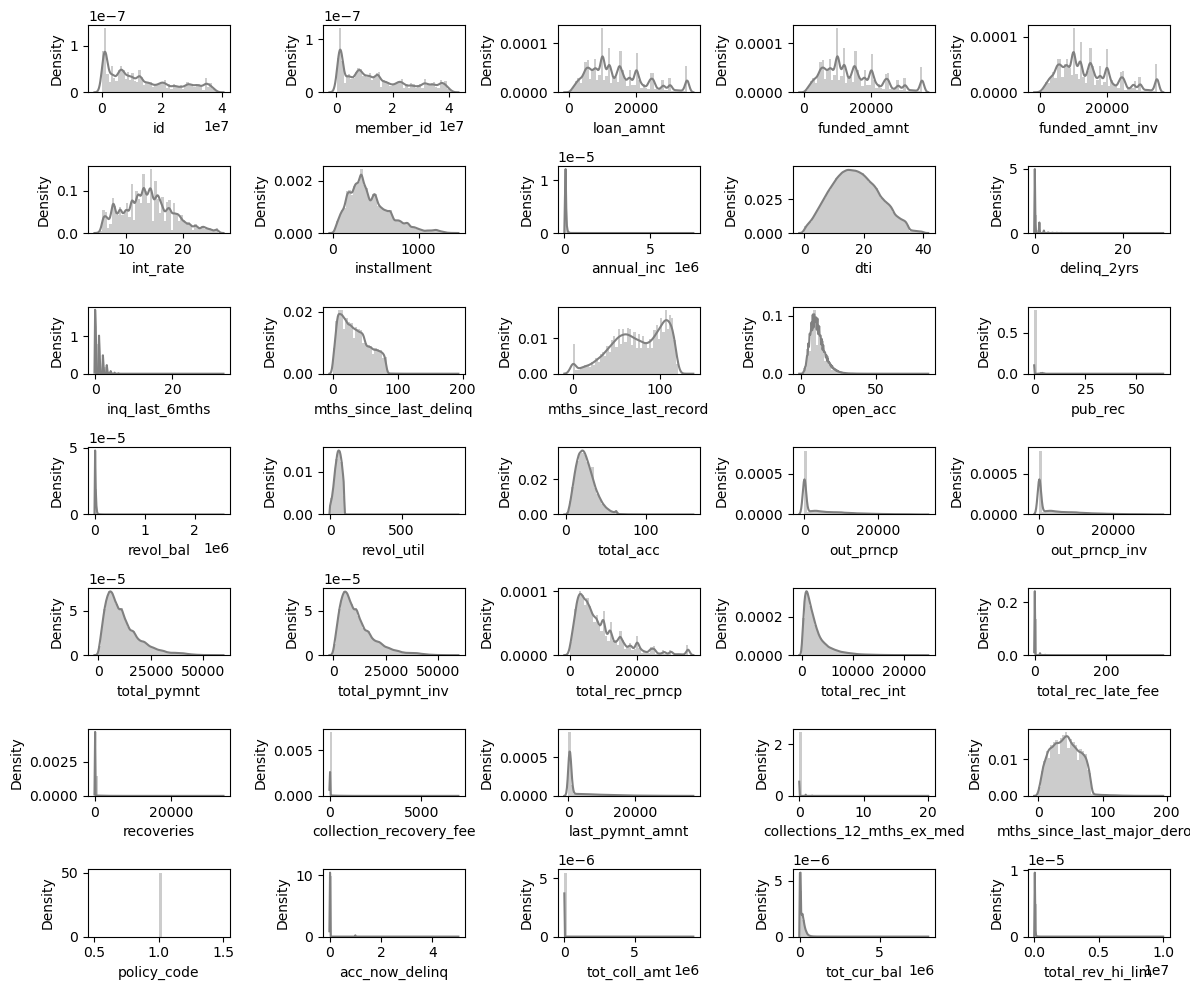

In [15]:
plt.figure(figsize=(12, 10))
for i in range(0, len(kolom_numerikal)):
    plt.subplot(7, 5, i+1)
    sns.distplot(df_loan[kolom_numerikal[i]], color='gray')
    plt.tight_layout()

#### Temuan

Beberapa kolom tidak terlihat distribusinya karena data hanya berkumpul di satu nilai dan sisanya menyebar. Hal ini terjadi karena Outliers yang terlalu banyak pada kolom tersebut. Ada potensi kolom kolom tersebut akan dihapus.

### Heatmap

<Axes: >

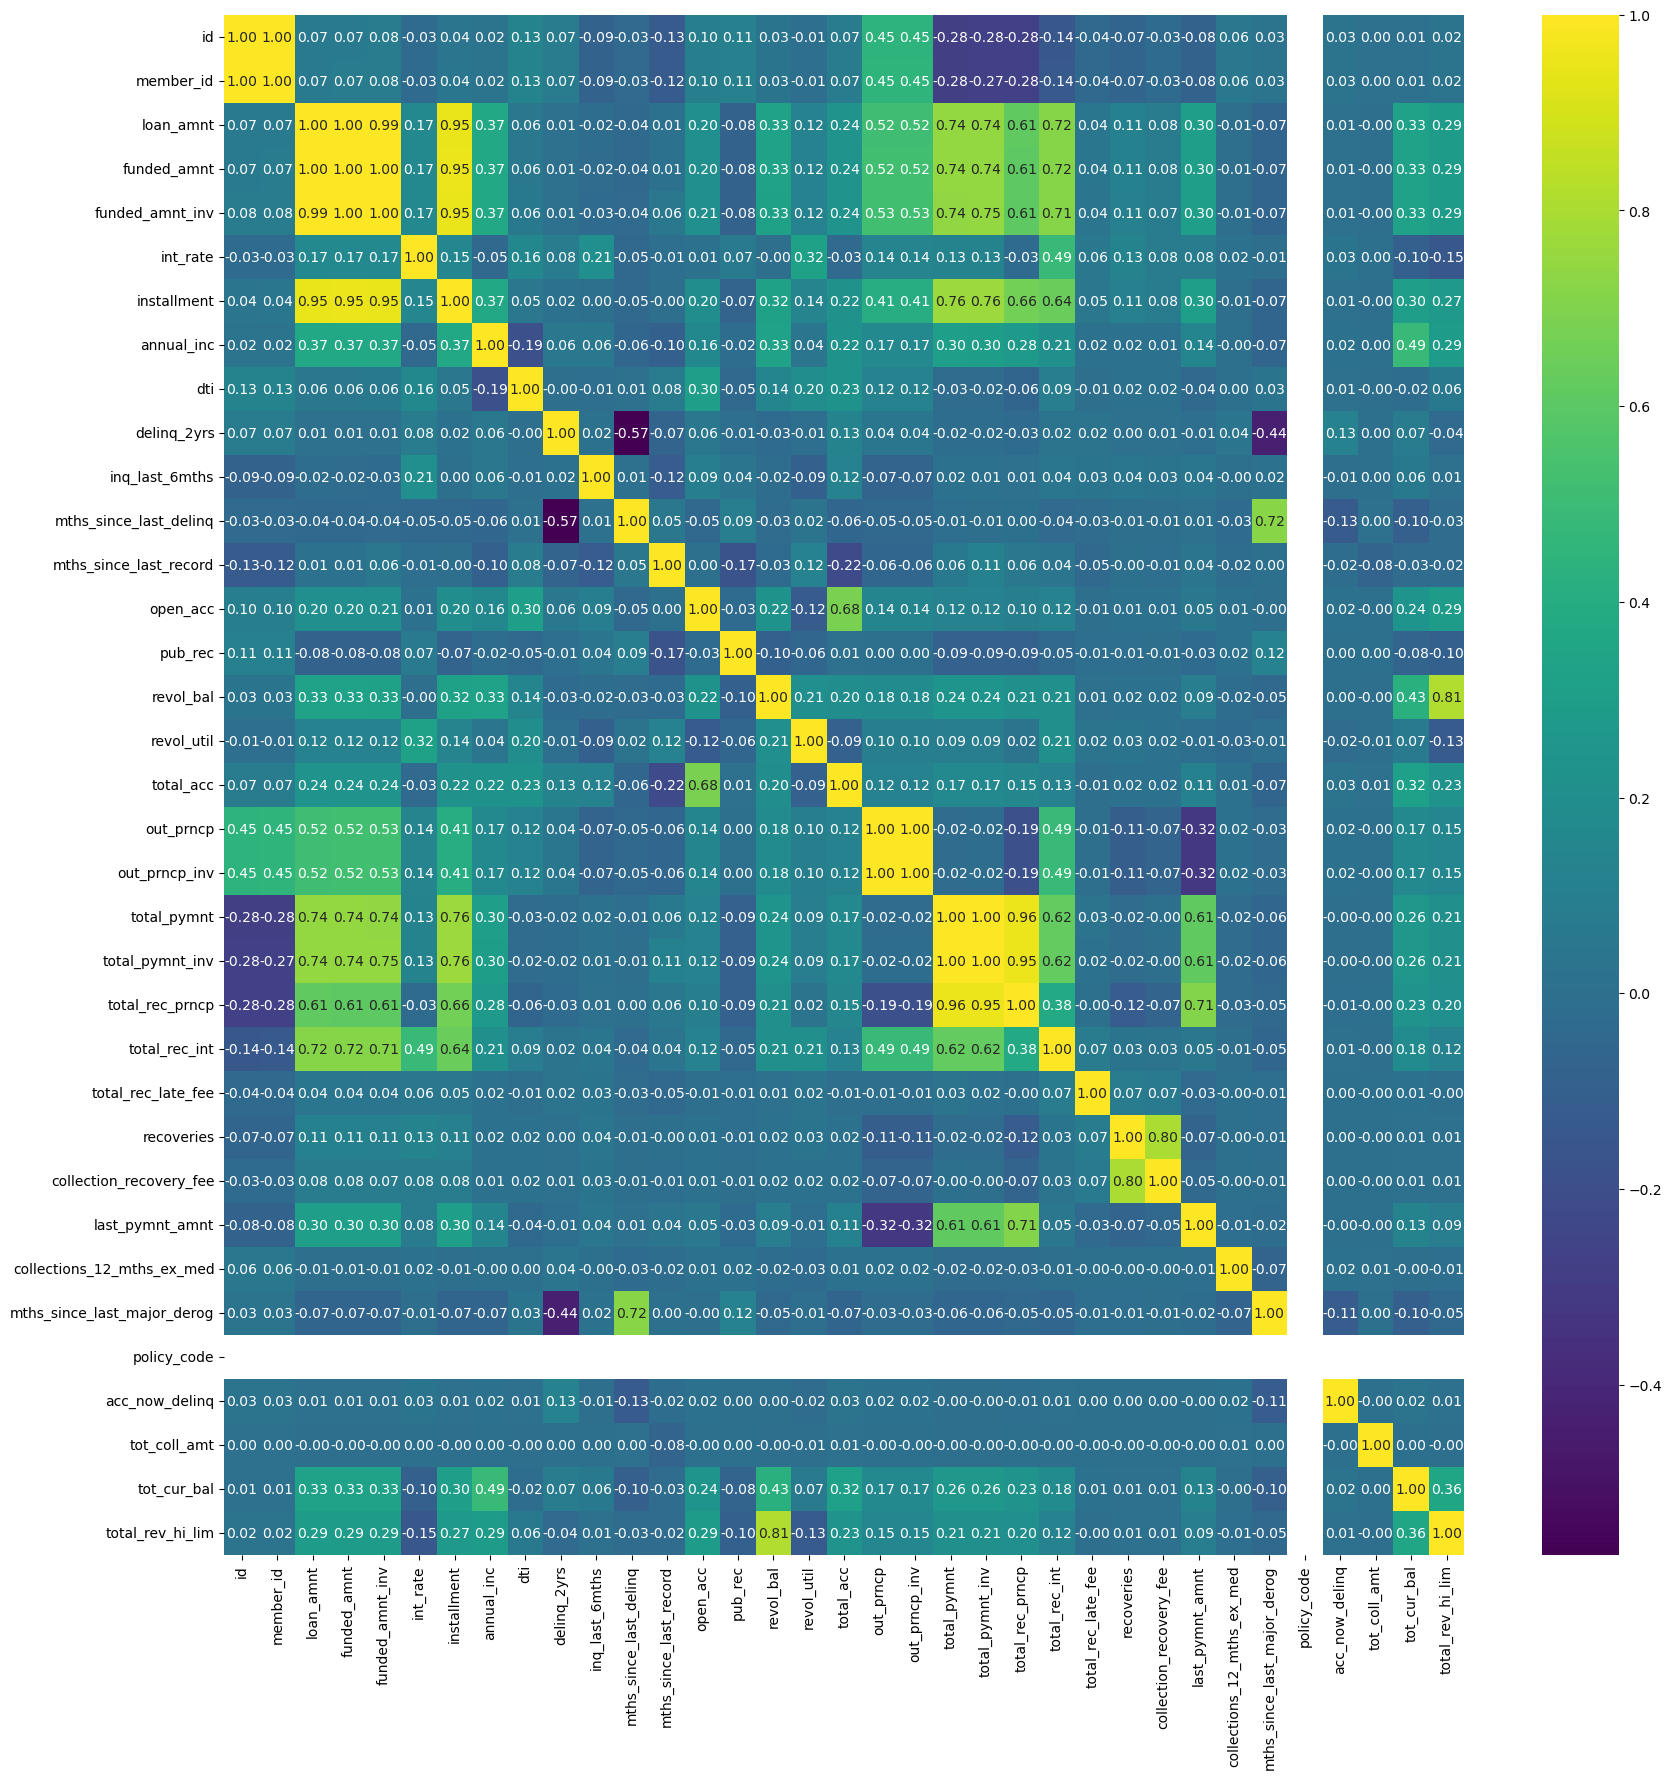

In [16]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_loan[kolom_numerikal].corr(), cmap='viridis', annot=True, fmt='.2f')

#### Temuan

Banyak Feature yang redundan, seperti id dengan member_id, loan_amount dengan funded_amount, dan lain sebagainya. Perbandingan hubungan positif dengan negatif, lebih banyak feature yang memiliki hubungan positif, salah satu feature yang memiliki hubungan positif dengan nilai yang tinggi adalah total_payment dengan loan_amount yaitu 74. Sedangkan salah satu hubungan negatif yang paling tinggi adalah delinq_2yrs dengan mths_since_last_delinq yaitu -57.

## HAPUS KOLOM DAN LANJUTAN EDA

### Hapus Kolom

In [17]:
# daftar kolom yang akan di hapus
kolom_dihapus2 = ['id', 'member_id', 'desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'url', 'emp_title', 'policy_code', 'application_type', 'pymnt_plan', 'funded_amnt', 'funded_amnt_inv', 'installment', 'out_prncp_inv', 'total_pymnt_inv', 'total_rec_prncp']

# Hapus Kolom pada variabel kolom_dihapus
df_loan.drop(columns=kolom_dihapus2, inplace=True)

#### Alasan Menghapus Kolom Tersebut

Alasan kolom tersebut di hapus adalah sebagai berikut : <br>
* Kolom kategorikal yang memiliki jumlah unik value yang terlalu banyak
* kolom dengan presentase nilai null lebih dari 40%
* Kolom yang redundan 
* kolom yang memiliki 1 nilai
* kolom yang hampir memiliki 1 nilai

Untuk informasi lebih detail mengenai kolom - kolom yang dihapus dapat diakses [disini](https://docs.google.com/document/d/1YxvRDpsjv0MpIfZA9DiXLX4mqpKdVMIyo-aFocB8zho/edit?usp=sharing)

In [18]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   term                        466285 non-null  object 
 2   int_rate                    466285 non-null  float64
 3   grade                       466285 non-null  object 
 4   sub_grade                   466285 non-null  object 
 5   emp_length                  445277 non-null  object 
 6   home_ownership              466285 non-null  object 
 7   annual_inc                  466281 non-null  float64
 8   verification_status         466285 non-null  object 
 9   issue_d                     466285 non-null  object 
 10  loan_status                 466285 non-null  object 
 11  purpose                     466285 non-null  object 
 12  title                       466264 non-null  object 
 13  zip_code      

### Analisis Kategorikal

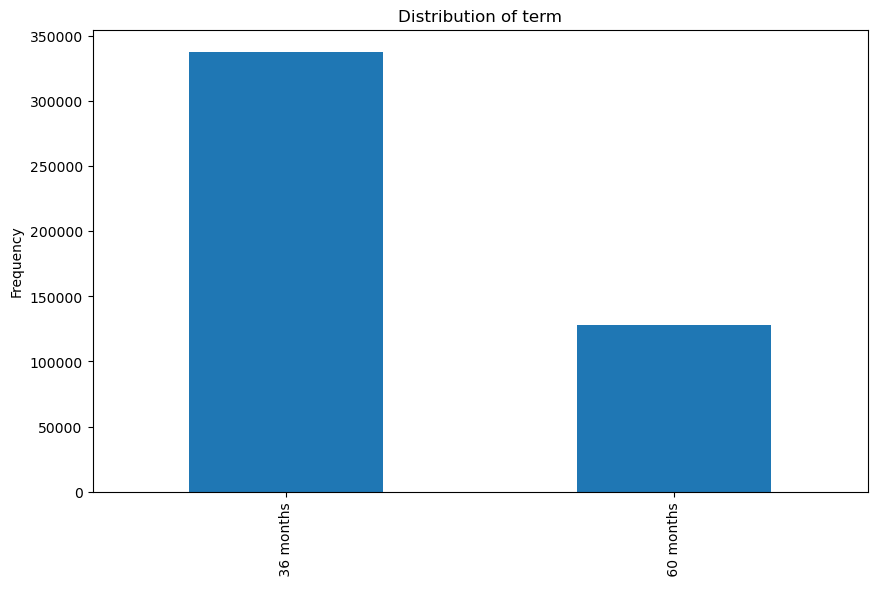

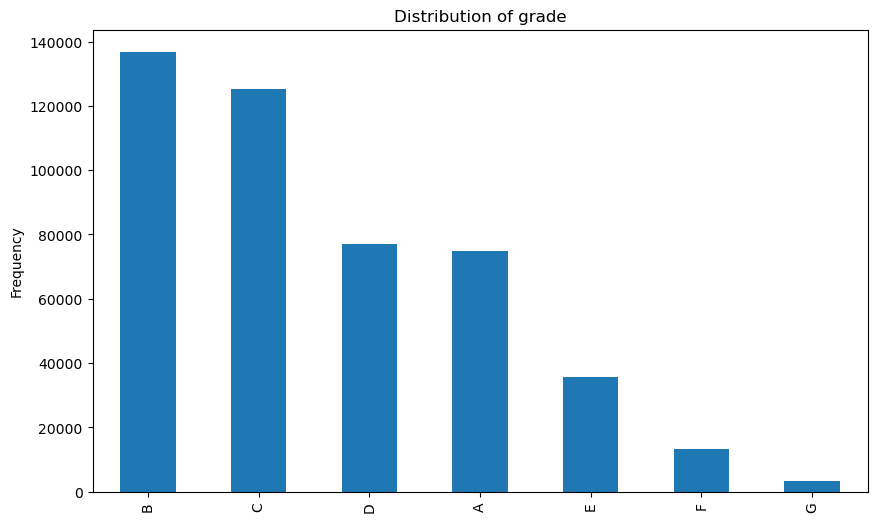

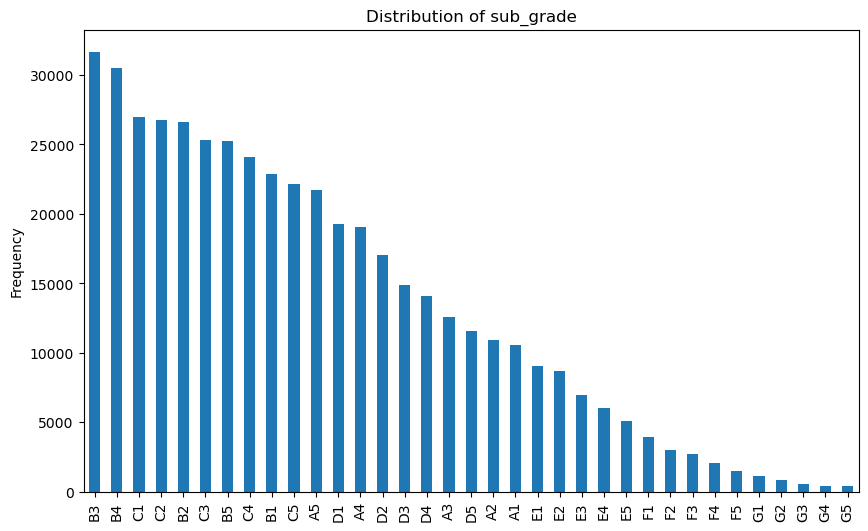

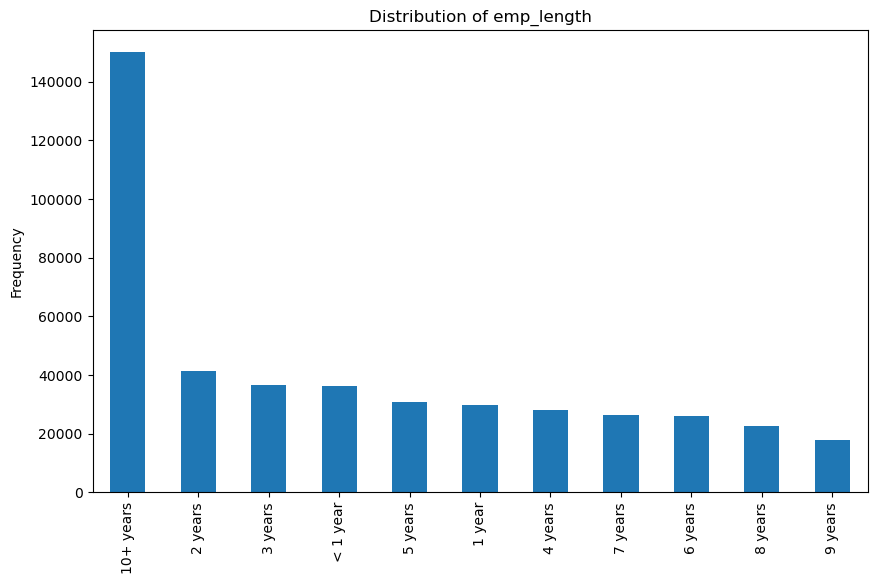

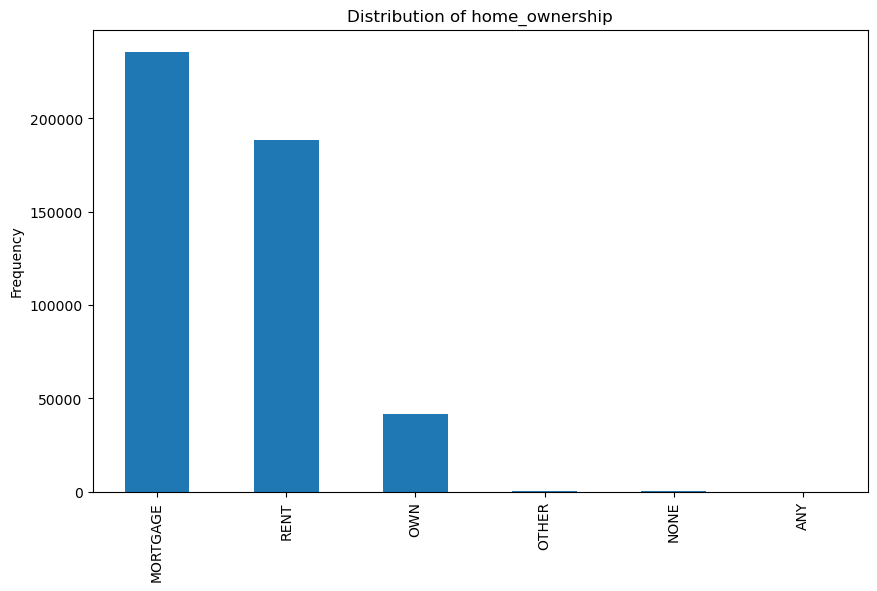

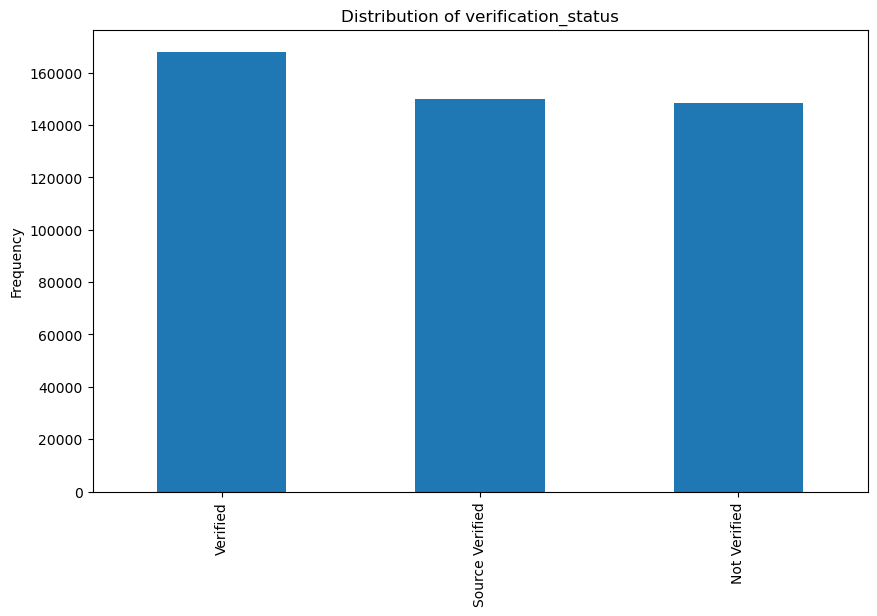

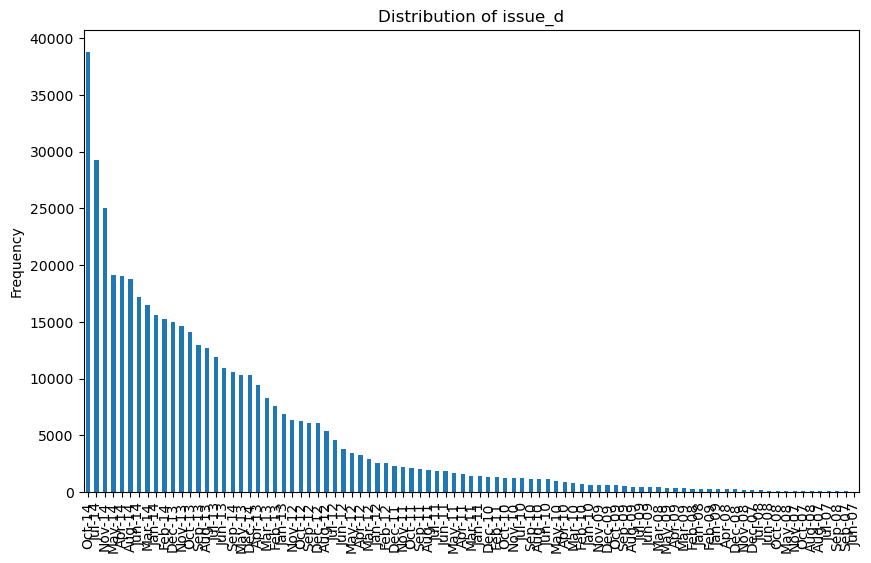

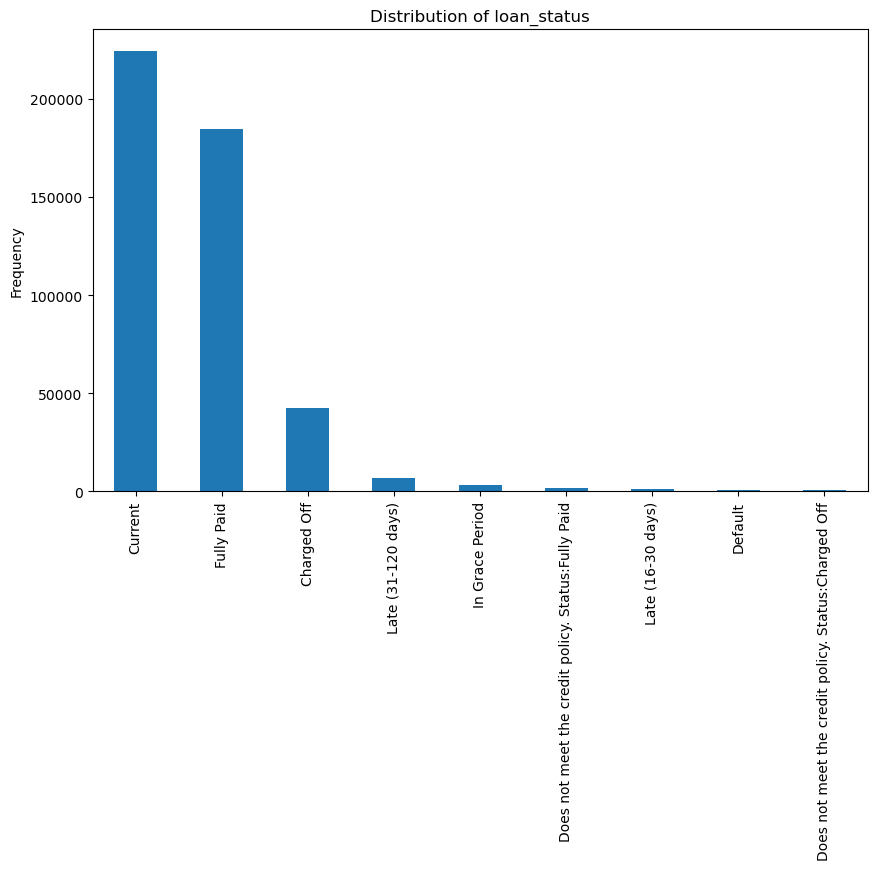

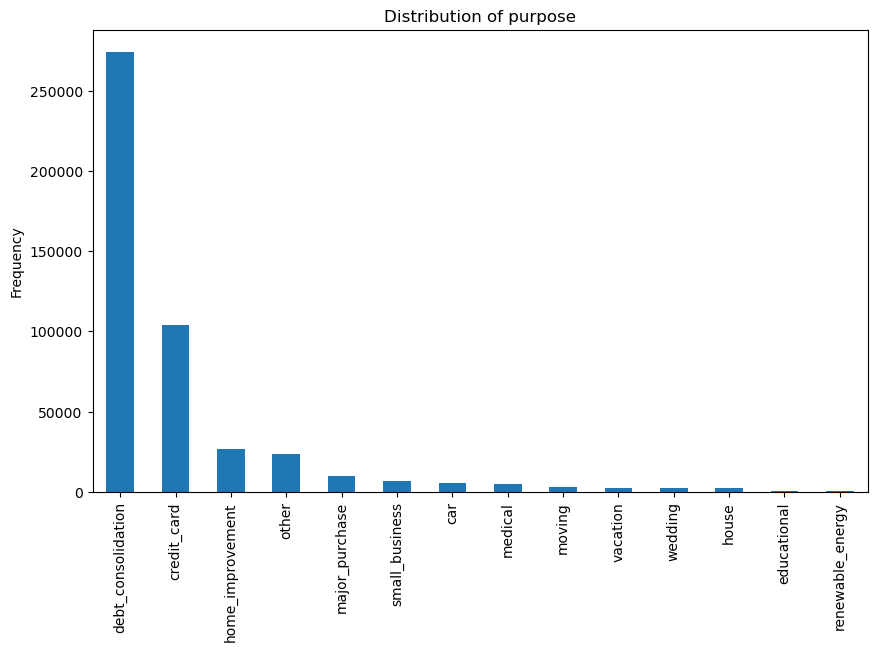

C:\Users\sanny\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: 
Money$$
     ^
ParseException: Expected end of text, found '$'  (at char 5), (line:1, col:6)

<Figure size 1000x600 with 1 Axes>

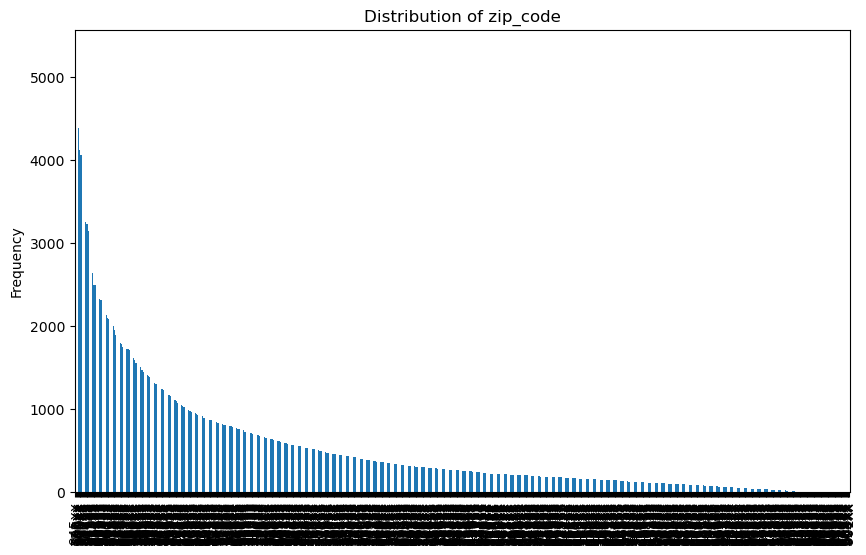

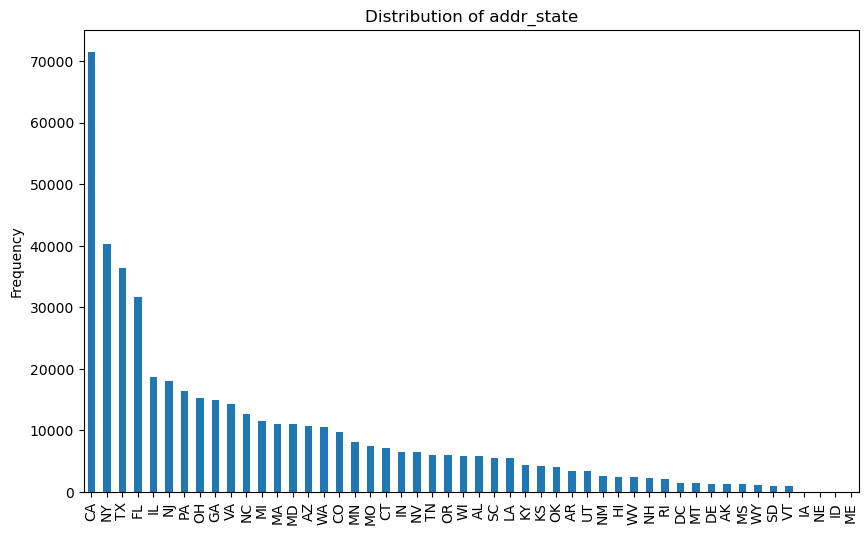

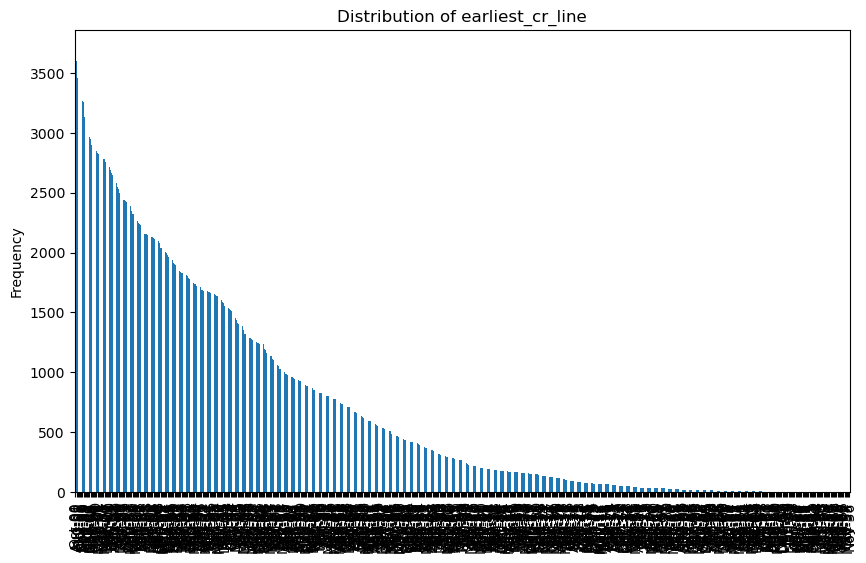

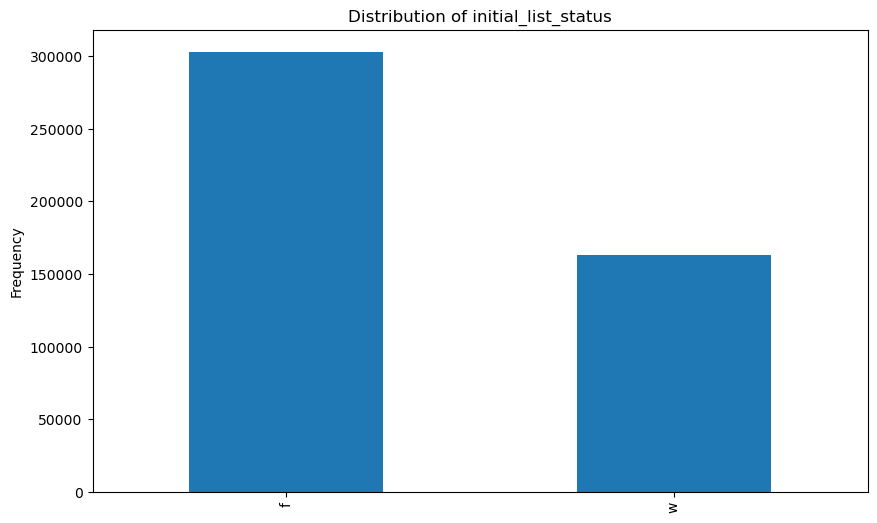

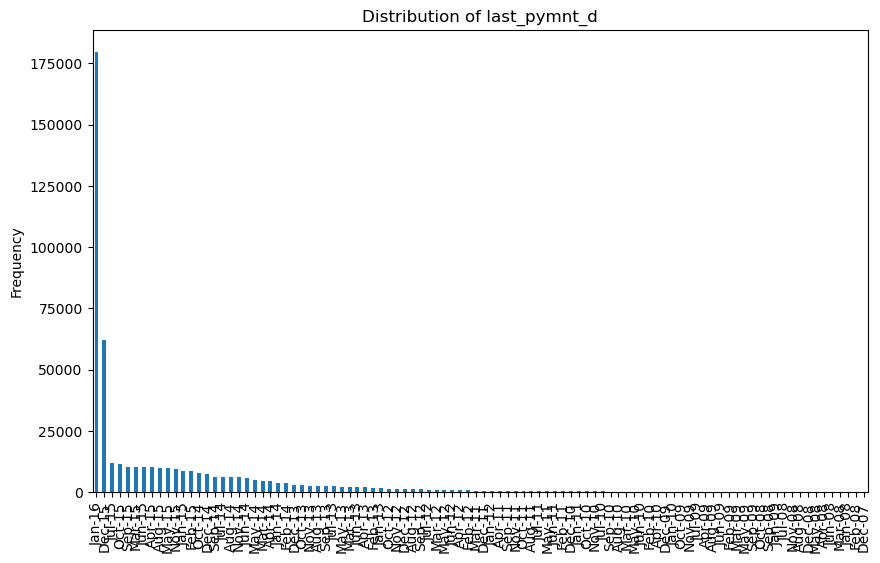

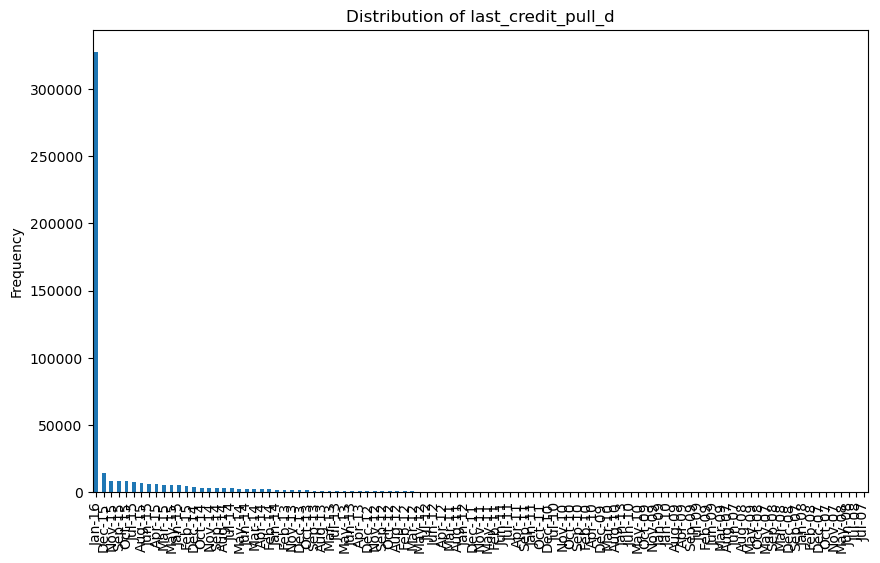

In [19]:
kolom_kategorikal = df_loan.select_dtypes(include=['object']).columns

# Membuat bar chart untuk setiap kolom kategorikal
for i, col in enumerate(kolom_kategorikal):
    plt.figure(figsize=(10, 6))
    df_loan[col].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {col}")
    plt.xlabel("")
    plt.ylabel("Frequency")
    plt.show()

#### Temuan

Beberapa kolom terlalu banyak nilai Unik dan juga adanya ketidak sesuaian dalam tipe yang seharusnya adalah numerical. <br>
kolom title mengalami error. 

#### Tindakan

Tindakan
Kolom term akan diambil angkanya saja yaitu 36 dan 60 <br>
kolom emp_length diambil angkanya saja <br>
kolom issue_d akan di pihan antara angka tanggal dan bulan <br>
kolom zip_code akan di ambil angka depannya saja <br>
kolom earlist akan di pisah antara angka dengan bulan <br>
kolom last_payment_id di pisah antara angka dengan bulan <br>
kolom last_credit_pull di pisah antara angka dengan bulan

## HANDLING MISSING VALUES

In [20]:
# Hitung jumlah missing values untuk setiap kolom
jumlah_missing = df_loan.isnull().sum()

# Hitung persentase missing values untuk setiap kolom
persentase_missing = round((jumlah_missing / len(df_loan)) * 100, 2)

# Gabungkan hasil dalam satu DataFrame
missing_summary = pd.DataFrame({
    'Jumlah Missing Values': jumlah_missing,
    'Persentase Missing Values (%)': persentase_missing
})

# Filter hanya kolom yang memiliki missing values
missing_summary_filtered = missing_summary[missing_summary['Jumlah Missing Values'] > 0]

print(missing_summary_filtered)

                            Jumlah Missing Values  \
emp_length                                  21008   
annual_inc                                      4   
title                                          21   
delinq_2yrs                                    29   
earliest_cr_line                               29   
inq_last_6mths                                 29   
open_acc                                       29   
pub_rec                                        29   
revol_util                                    340   
total_acc                                      29   
last_pymnt_d                                  376   
last_credit_pull_d                             42   
collections_12_mths_ex_med                    145   
acc_now_delinq                                 29   
tot_coll_amt                                70276   
tot_cur_bal                                 70276   
total_rev_hi_lim                            70276   

                            Persentase Missin

In [21]:
# Menghapus baris yang memiliki nilai Null
df_loan.dropna(subset=['emp_length', 'annual_inc', 'title', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'last_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'acc_now_delinq'], inplace=True)

Alasan penghapusan baris di atas karen nilai missing values yang sedikit. 14 kolom tersebut memiliki missing values di bawah 10%

In [22]:
# Mengganti nilai NaN dengan median pada kolom1 dan kolom2
df_loan[['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']] = df_loan[['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']].apply(lambda x: x.fillna(x.median()))

Alasan mengganti dengan nilai Median adalah sebagai berikut : <br>
* Kolom bertipe Numeric
* Berdistribusi Skewed
* Nilai Missing Values lebih dari 10%

In [23]:
print('Cek Missing Values Kembali')
df_loan.isna().sum()

Cek Missing Values Kembali


loan_amnt                     0
term                          0
int_rate                      0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
total_pymnt                   0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pym

## FEATURE ENGINEERING

### Menghapus simbol + dan kata years pada kolom emp_lenght

In [24]:
# Menghapus kata "years" pada kolom tertentu
df_loan['emp_length'] = df_loan['emp_length'].str.replace('years', '')

In [25]:
# Menghapus kata "+" pada kolom tertentu
df_loan['emp_length'] = df_loan['emp_length'].str.replace('+', '')

In [26]:
# Menghapus kata "<" pada kolom tertentu
df_loan['emp_length'] = df_loan['emp_length'].str.replace('<', '')

# Menghapus kata "year" pada kolom tertentu
df_loan['emp_length'] = df_loan['emp_length'].str.replace('year', '')

In [27]:
df_loan['emp_length'] = df_loan['emp_length'].astype(int)

In [28]:
df_loan.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,36 months,10.65,B,B2,10,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0.00,Jan-85,1.00,3.00,0.00,13648,83.70,9.00,f,0.00,5861.07,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,0.00,0.00,0.00,84644.50,23000.00
1,2500,60 months,15.27,C,C4,1,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0.00,Apr-99,5.00,3.00,0.00,1687,9.40,4.00,f,0.00,1008.71,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00,0.00,0.00,84644.50,23000.00
2,2400,36 months,15.96,C,C5,10,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0.00,Nov-01,2.00,2.00,0.00,2956,98.50,10.00,f,0.00,3003.65,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,0.00,0.00,0.00,84644.50,23000.00
3,10000,36 months,13.49,C,C1,10,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0.00,Feb-96,1.00,10.00,0.00,5598,21.00,37.00,f,0.00,12226.30,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,0.00,0.00,0.00,84644.50,23000.00
4,3000,60 months,12.69,B,B5,1,RENT,80000.00,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0.00,Jan-96,0.00,15.00,0.00,27783,53.90,38.00,f,766.90,3242.17,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,0.00,0.00,0.00,84644.50,23000.00


### Memisahkan kolom Tanggal dan Bulan

In [29]:
# Kolom issue_d

# Parse kolom sebagai datetime
df_loan['issue_d'] = pd.to_datetime(df_loan['issue_d'], format='%b-%y')

# Ekstrak komponen bulan dan tanggal
df_loan['bulan_issue_d'] = df_loan['issue_d'].dt.month
df_loan['tanggal_issue_d'] = df_loan['issue_d'].dt.day

# Hapus kolom asli
df_loan.drop('issue_d', axis=1, inplace=True)

In [30]:
# last_credit_pull_d

# Parse kolom sebagai datetime
df_loan['last_credit_pull_d'] = pd.to_datetime(df_loan['last_credit_pull_d'], format='%b-%y')

# Ekstrak komponen bulan dan tanggal
df_loan['bulan_last_credit_pull_d'] = df_loan['last_credit_pull_d'].dt.month
df_loan['tanggal_last_credit_pull_d'] = df_loan['last_credit_pull_d'].dt.day

# Hapus kolom asli
df_loan.drop('last_credit_pull_d', axis=1, inplace=True)

In [31]:
# last_pymnt_d

# Parse kolom sebagai datetime
df_loan['last_pymnt_d'] = pd.to_datetime(df_loan['last_pymnt_d'], format='%b-%y')

# Ekstrak komponen bulan dan tanggal
df_loan['bulan_last_pymnt_d'] = df_loan['last_pymnt_d'].dt.month
df_loan['tanggal_last_pymnt_d'] = df_loan['last_pymnt_d'].dt.day

# Hapus kolom asli
df_loan.drop('last_pymnt_d', axis=1, inplace=True)

In [32]:
# last_pymnt_d

# Parse kolom sebagai datetime
df_loan['earliest_cr_line'] = pd.to_datetime(df_loan['earliest_cr_line'], format='%b-%y')

# Ekstrak komponen bulan dan tanggal
df_loan['bulan_earliest_cr_line'] = df_loan['earliest_cr_line'].dt.month
df_loan['tanggal_earliest_cr_line'] = df_loan['earliest_cr_line'].dt.day

# Hapus kolom asli
df_loan.drop('earliest_cr_line', axis=1, inplace=True)

In [33]:
df_loan.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,bulan_issue_d,tanggal_issue_d,bulan_last_credit_pull_d,tanggal_last_credit_pull_d,bulan_last_pymnt_d,tanggal_last_pymnt_d,bulan_earliest_cr_line,tanggal_earliest_cr_line
0,5000,36 months,10.65,B,B2,10,RENT,24000.00,Verified,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0.00,1.00,3.00,0.00,13648,83.70,9.00,f,0.00,5861.07,861.07,0.00,0.00,0.00,171.62,0.00,0.00,0.00,84644.50,23000.00,12,1,1,1,1,1,1,1
1,2500,60 months,15.27,C,C4,1,RENT,30000.00,Source Verified,Charged Off,car,bike,309xx,GA,1.00,0.00,5.00,3.00,0.00,1687,9.40,4.00,f,0.00,1008.71,435.17,0.00,117.08,1.11,119.66,0.00,0.00,0.00,84644.50,23000.00,12,1,9,1,4,1,4,1
2,2400,36 months,15.96,C,C5,10,RENT,12252.00,Not Verified,Fully Paid,small_business,real estate business,606xx,IL,8.72,0.00,2.00,2.00,0.00,2956,98.50,10.00,f,0.00,3003.65,603.65,0.00,0.00,0.00,649.91,0.00,0.00,0.00,84644.50,23000.00,12,1,1,1,6,1,11,1
3,10000,36 months,13.49,C,C1,10,RENT,49200.00,Source Verified,Fully Paid,other,personel,917xx,CA,20.00,0.00,1.00,10.00,0.00,5598,21.00,37.00,f,0.00,12226.30,2209.33,16.97,0.00,0.00,357.48,0.00,0.00,0.00,84644.50,23000.00,12,1,1,1,1,1,2,1
4,3000,60 months,12.69,B,B5,1,RENT,80000.00,Source Verified,Current,other,Personal,972xx,OR,17.94,0.00,0.00,15.00,0.00,27783,53.90,38.00,f,766.90,3242.17,1009.07,0.00,0.00,0.00,67.79,0.00,0.00,0.00,84644.50,23000.00,12,1,1,1,1,1,1,1


### Menghapus kata months pada kolom term

In [34]:
# Menghapus kata "months" pada kolom tertentu
df_loan['term'] = df_loan['term'].str.replace('months', '')

In [35]:
df_loan['term'] = df_loan['term'].astype(int)

In [36]:
df_loan.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,bulan_issue_d,tanggal_issue_d,bulan_last_credit_pull_d,tanggal_last_credit_pull_d,bulan_last_pymnt_d,tanggal_last_pymnt_d,bulan_earliest_cr_line,tanggal_earliest_cr_line
0,5000,36,10.65,B,B2,10,RENT,24000.00,Verified,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0.00,1.00,3.00,0.00,13648,83.70,9.00,f,0.00,5861.07,861.07,0.00,0.00,0.00,171.62,0.00,0.00,0.00,84644.50,23000.00,12,1,1,1,1,1,1,1
1,2500,60,15.27,C,C4,1,RENT,30000.00,Source Verified,Charged Off,car,bike,309xx,GA,1.00,0.00,5.00,3.00,0.00,1687,9.40,4.00,f,0.00,1008.71,435.17,0.00,117.08,1.11,119.66,0.00,0.00,0.00,84644.50,23000.00,12,1,9,1,4,1,4,1
2,2400,36,15.96,C,C5,10,RENT,12252.00,Not Verified,Fully Paid,small_business,real estate business,606xx,IL,8.72,0.00,2.00,2.00,0.00,2956,98.50,10.00,f,0.00,3003.65,603.65,0.00,0.00,0.00,649.91,0.00,0.00,0.00,84644.50,23000.00,12,1,1,1,6,1,11,1
3,10000,36,13.49,C,C1,10,RENT,49200.00,Source Verified,Fully Paid,other,personel,917xx,CA,20.00,0.00,1.00,10.00,0.00,5598,21.00,37.00,f,0.00,12226.30,2209.33,16.97,0.00,0.00,357.48,0.00,0.00,0.00,84644.50,23000.00,12,1,1,1,1,1,2,1
4,3000,60,12.69,B,B5,1,RENT,80000.00,Source Verified,Current,other,Personal,972xx,OR,17.94,0.00,0.00,15.00,0.00,27783,53.90,38.00,f,766.90,3242.17,1009.07,0.00,0.00,0.00,67.79,0.00,0.00,0.00,84644.50,23000.00,12,1,1,1,1,1,1,1


### Menghapus kata xx pada zip_code

In [37]:
df_loan['zip_code'] = df_loan['zip_code'].str.replace('xx', '')

In [38]:
df_loan['zip_code'] = df_loan['zip_code'].astype(int)

In [39]:
df_loan.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,bulan_issue_d,tanggal_issue_d,bulan_last_credit_pull_d,tanggal_last_credit_pull_d,bulan_last_pymnt_d,tanggal_last_pymnt_d,bulan_earliest_cr_line,tanggal_earliest_cr_line
0,5000,36,10.65,B,B2,10,RENT,24000.00,Verified,Fully Paid,credit_card,Computer,860,AZ,27.65,0.00,1.00,3.00,0.00,13648,83.70,9.00,f,0.00,5861.07,861.07,0.00,0.00,0.00,171.62,0.00,0.00,0.00,84644.50,23000.00,12,1,1,1,1,1,1,1
1,2500,60,15.27,C,C4,1,RENT,30000.00,Source Verified,Charged Off,car,bike,309,GA,1.00,0.00,5.00,3.00,0.00,1687,9.40,4.00,f,0.00,1008.71,435.17,0.00,117.08,1.11,119.66,0.00,0.00,0.00,84644.50,23000.00,12,1,9,1,4,1,4,1
2,2400,36,15.96,C,C5,10,RENT,12252.00,Not Verified,Fully Paid,small_business,real estate business,606,IL,8.72,0.00,2.00,2.00,0.00,2956,98.50,10.00,f,0.00,3003.65,603.65,0.00,0.00,0.00,649.91,0.00,0.00,0.00,84644.50,23000.00,12,1,1,1,6,1,11,1
3,10000,36,13.49,C,C1,10,RENT,49200.00,Source Verified,Fully Paid,other,personel,917,CA,20.00,0.00,1.00,10.00,0.00,5598,21.00,37.00,f,0.00,12226.30,2209.33,16.97,0.00,0.00,357.48,0.00,0.00,0.00,84644.50,23000.00,12,1,1,1,1,1,2,1
4,3000,60,12.69,B,B5,1,RENT,80000.00,Source Verified,Current,other,Personal,972,OR,17.94,0.00,0.00,15.00,0.00,27783,53.90,38.00,f,766.90,3242.17,1009.07,0.00,0.00,0.00,67.79,0.00,0.00,0.00,84644.50,23000.00,12,1,1,1,1,1,1,1


### Membuat kolom target yaitu risk

In [40]:
# Create a new column "risk" based on the values in "loan_status"
df_loan['risk'] = df_loan['loan_status'].apply(lambda x: 0 if x in ['Current', 'Fully Paid', 'In Grace Period'] else 1)

In [41]:
# Hapus kolom loan_status
df_loan = df_loan.drop('loan_status', axis=1)

In [42]:
df_loan.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,bulan_issue_d,tanggal_issue_d,bulan_last_credit_pull_d,tanggal_last_credit_pull_d,bulan_last_pymnt_d,tanggal_last_pymnt_d,bulan_earliest_cr_line,tanggal_earliest_cr_line,risk
0,5000,36,10.65,B,B2,10,RENT,24000.00,Verified,credit_card,Computer,860,AZ,27.65,0.00,1.00,3.00,0.00,13648,83.70,9.00,f,0.00,5861.07,861.07,0.00,0.00,0.00,171.62,0.00,0.00,0.00,84644.50,23000.00,12,1,1,1,1,1,1,1,0
1,2500,60,15.27,C,C4,1,RENT,30000.00,Source Verified,car,bike,309,GA,1.00,0.00,5.00,3.00,0.00,1687,9.40,4.00,f,0.00,1008.71,435.17,0.00,117.08,1.11,119.66,0.00,0.00,0.00,84644.50,23000.00,12,1,9,1,4,1,4,1,1
2,2400,36,15.96,C,C5,10,RENT,12252.00,Not Verified,small_business,real estate business,606,IL,8.72,0.00,2.00,2.00,0.00,2956,98.50,10.00,f,0.00,3003.65,603.65,0.00,0.00,0.00,649.91,0.00,0.00,0.00,84644.50,23000.00,12,1,1,1,6,1,11,1,0
3,10000,36,13.49,C,C1,10,RENT,49200.00,Source Verified,other,personel,917,CA,20.00,0.00,1.00,10.00,0.00,5598,21.00,37.00,f,0.00,12226.30,2209.33,16.97,0.00,0.00,357.48,0.00,0.00,0.00,84644.50,23000.00,12,1,1,1,1,1,2,1,0
4,3000,60,12.69,B,B5,1,RENT,80000.00,Source Verified,other,Personal,972,OR,17.94,0.00,0.00,15.00,0.00,27783,53.90,38.00,f,766.90,3242.17,1009.07,0.00,0.00,0.00,67.79,0.00,0.00,0.00,84644.50,23000.00,12,1,1,1,1,1,1,1,0


Alasan membuat kolom target dengan judul risk karena tujuan dari pembuatan Machine Learning ini untuk mengembangkan dan mengetahui prediksi apakah user dengan pola data tertentu beresiko untuk mengganggu arus kas perusahaan atau tidak.

Pengambilan nilai pada kolom risk adalah dengan melihat isi dari nilai loan_status. Mengapa demikian? karena status pemimjaman mempresentasikan apakah user membayarnya tepat waktu, terlambat, atau bahkan tidak membayar sama sekali. Hal ini tentunya menjadi dasar user yang terlambat membayar atau bahkan tidak membayar dianggap beresiko maka diberi nilai 1. User yang membayar tepat waktu diberi nilai 0 yang berarti tidak beresiko.

## DATA PREPROCESSING

### Penanganan Outliers dengan Log Transformation

In [43]:
target_col = 'risk'  # Ganti dengan nama kolom target Anda
numerical_cols = df_loan.select_dtypes(include=['number']).columns.drop(target_col)
categorical_cols = df_loan.select_dtypes(include=['object', 'category']).columns

In [44]:
# Cek nilai negatif dan nol
df_loan[numerical_cols] = df_loan[numerical_cols].apply(lambda x: x + 1 if (x <= 0).any() else x)

In [45]:
# Log Transformation Kolom Numerical
df_loan[numerical_cols] = df_loan[numerical_cols].apply(np.log1p)

In [46]:
transformed_df = pd.concat([df_loan[categorical_cols], df_loan[numerical_cols], df_loan[target_col]], axis=1)

In [47]:
transformed_df.head()

,grade,sub_grade,home_ownership,verification_status,purpose,title,addr_state,initial_list_status,loan_amnt,term,int_rate,emp_length,annual_inc,zip_code,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,bulan_issue_d,tanggal_issue_d,bulan_last_credit_pull_d,tanggal_last_credit_pull_d,bulan_last_pymnt_d,tanggal_last_pymnt_d,bulan_earliest_cr_line,tanggal_earliest_cr_line,risk
0,B,B2,RENT,Verified,credit_card,Computer,AZ,f,8.52,3.61,2.46,2.40,10.09,6.76,3.39,0.69,1.10,1.39,0.69,9.52,4.45,2.30,0.69,8.68,6.76,0.69,0.69,0.69,5.16,0.69,0.69,0.69,11.35,10.04,2.56,0.69,0.69,0.69,0.69,0.69,0.69,0.69,0
1,C,C4,RENT,Source Verified,car,bike,GA,f,7.82,4.11,2.79,0.69,10.31,5.74,1.10,0.69,1.95,1.39,0.69,7.43,2.43,1.61,0.69,6.92,6.08,0.69,4.78,1.13,4.80,0.69,0.69,0.69,11.35,10.04,2.56,0.69,2.30,0.69,1.61,0.69,1.61,0.69,1
2,C,C5,RENT,Not Verified,small_business,real estate business,IL,f,7.78,3.61,2.83,2.40,9.41,6.41,2.37,0.69,1.39,1.10,0.69,7.99,4.61,2.40,0.69,8.01,6.41,0.69,0.69,0.69,6.48,0.69,0.69,0.69,11.35,10.04,2.56,0.69,0.69,0.69,1.95,0.69,2.48,0.69,0
3,C,C1,RENT,Source Verified,other,personel,CA,f,9.21,3.61,2.67,2.40,10.80,6.82,3.09,0.69,1.10,2.40,0.69,8.63,3.14,3.64,0.69,9.41,7.70,2.94,0.69,0.69,5.88,0.69,0.69,0.69,11.35,10.04,2.56,0.69,0.69,0.69,0.69,0.69,1.10,0.69,0
4,B,B5,RENT,Source Verified,other,Personal,OR,f,8.01,4.11,2.62,0.69,11.29,6.88,2.99,0.69,0.69,2.77,0.69,10.23,4.02,3.66,6.64,8.08,6.92,0.69,0.69,0.69,4.25,0.69,0.69,0.69,11.35,10.04,2.56,0.69,0.69,0.69,0.69,0.69,0.69,0.69,0


### Encoding Kolom Kategorikal

#### Menghapus kolom kategorikal (Hapus Tambahan)

In [48]:
# daftar kolom yang akan di hapus
kolom_dihapus3 = ['title', 'sub_grade', 'addr_state']

# Hapus Kolom pada variabel kolom_dihapus
df_loan.drop(columns=kolom_dihapus3, inplace=True)

In [49]:
# memisahkan kolom kategorikal nominal dan ordinal
nominal = ['home_ownership', 'verification_status', 'loan_status', 'purpose', 'initial_list_status']
ordinal = ['grade']

In [50]:
# One Hot Encoding untuk kolom kategorikal Nominal
df_encoded = pd.get_dummies(df_loan, columns=['home_ownership', 'verification_status', 'purpose', 'initial_list_status'])

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
# Label Encoding untuk kolom kategorikal Ordinal
label_encoder = LabelEncoder()

df_encoded['grade_encode'] = label_encoder.fit_transform(df_encoded['grade'])

df_encoded = df_encoded.drop('grade', axis=1)

In [53]:
df_encoded.head()

,loan_amnt,term,int_rate,emp_length,annual_inc,zip_code,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,bulan_issue_d,tanggal_issue_d,bulan_last_credit_pull_d,tanggal_last_credit_pull_d,bulan_last_pymnt_d,tanggal_last_pymnt_d,bulan_earliest_cr_line,tanggal_earliest_cr_line,risk,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w,grade_encode
0,8.52,3.61,2.46,2.40,10.09,6.76,3.39,0.69,1.10,1.39,0.69,9.52,4.45,2.30,0.69,8.68,6.76,0.69,0.69,0.69,5.16,0.69,0.69,0.69,11.35,10.04,2.56,0.69,0.69,0.69,0.69,0.69,0.69,0.69,0,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,1
1,7.82,4.11,2.79,0.69,10.31,5.74,1.10,0.69,1.95,1.39,0.69,7.43,2.43,1.61,0.69,6.92,6.08,0.69,4.78,1.13,4.80,0.69,0.69,0.69,11.35,10.04,2.56,0.69,2.30,0.69,1.61,0.69,1.61,0.69,1,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,2
2,7.78,3.61,2.83,2.40,9.41,6.41,2.37,0.69,1.39,1.10,0.69,7.99,4.61,2.40,0.69,8.01,6.41,0.69,0.69,0.69,6.48,0.69,0.69,0.69,11.35,10.04,2.56,0.69,0.69,0.69,1.95,0.69,2.48,0.69,0,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,2
3,9.21,3.61,2.67,2.40,10.80,6.82,3.09,0.69,1.10,2.40,0.69,8.63,3.14,3.64,0.69,9.41,7.70,2.94,0.69,0.69,5.88,0.69,0.69,0.69,11.35,10.04,2.56,0.69,0.69,0.69,0.69,0.69,1.10,0.69,0,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,2
4,8.01,4.11,2.62,0.69,11.29,6.88,2.99,0.69,0.69,2.77,0.69,10.23,4.02,3.66,6.64,8.08,6.92,0.69,0.69,0.69,4.25,0.69,0.69,0.69,11.35,10.04,2.56,0.69,0.69,0.69,0.69,0.69,0.69,0.69,0,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,1


#### Memindahkan Target ke paling Kanan

In [54]:
# Misalkan df adalah DataFrame-mu dan 'risk' adalah nama kolom target
kolom_target = 'risk'

# Memindahkan kolom target ke paling kanan
kolom_lain = [kolom for kolom in df_encoded.columns if kolom != kolom_target]
df_encoded = df_encoded[kolom_lain + [kolom_target]]

In [55]:
df_encoded.head()

,loan_amnt,term,int_rate,emp_length,annual_inc,zip_code,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,bulan_issue_d,tanggal_issue_d,bulan_last_credit_pull_d,tanggal_last_credit_pull_d,bulan_last_pymnt_d,tanggal_last_pymnt_d,bulan_earliest_cr_line,tanggal_earliest_cr_line,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w,grade_encode,risk
0,8.52,3.61,2.46,2.40,10.09,6.76,3.39,0.69,1.10,1.39,0.69,9.52,4.45,2.30,0.69,8.68,6.76,0.69,0.69,0.69,5.16,0.69,0.69,0.69,11.35,10.04,2.56,0.69,0.69,0.69,0.69,0.69,0.69,0.69,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,1,0
1,7.82,4.11,2.79,0.69,10.31,5.74,1.10,0.69,1.95,1.39,0.69,7.43,2.43,1.61,0.69,6.92,6.08,0.69,4.78,1.13,4.80,0.69,0.69,0.69,11.35,10.04,2.56,0.69,2.30,0.69,1.61,0.69,1.61,0.69,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,2,1
2,7.78,3.61,2.83,2.40,9.41,6.41,2.37,0.69,1.39,1.10,0.69,7.99,4.61,2.40,0.69,8.01,6.41,0.69,0.69,0.69,6.48,0.69,0.69,0.69,11.35,10.04,2.56,0.69,0.69,0.69,1.95,0.69,2.48,0.69,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,2,0
3,9.21,3.61,2.67,2.40,10.80,6.82,3.09,0.69,1.10,2.40,0.69,8.63,3.14,3.64,0.69,9.41,7.70,2.94,0.69,0.69,5.88,0.69,0.69,0.69,11.35,10.04,2.56,0.69,0.69,0.69,0.69,0.69,1.10,0.69,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,2,0
4,8.01,4.11,2.62,0.69,11.29,6.88,2.99,0.69,0.69,2.77,0.69,10.23,4.02,3.66,6.64,8.08,6.92,0.69,0.69,0.69,4.25,0.69,0.69,0.69,11.35,10.04,2.56,0.69,0.69,0.69,0.69,0.69,0.69,0.69,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,1,0


#### Mengubah nilai Boolean menjadi 1 0

In [56]:
# Mengubah semua kolom boolean menjadi integer (1 dan 0)
df_encoded = df_encoded.applymap(lambda x: int(x) if isinstance(x, bool) else x)

C:\Users\sanny\AppData\Local\Temp\ipykernel_17564\1123467514.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_encoded = df_encoded.applymap(lambda x: int(x) if isinstance(x, bool) else x)


In [57]:
df_encoded.head()

,loan_amnt,term,int_rate,emp_length,annual_inc,zip_code,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,bulan_issue_d,tanggal_issue_d,bulan_last_credit_pull_d,tanggal_last_credit_pull_d,bulan_last_pymnt_d,tanggal_last_pymnt_d,bulan_earliest_cr_line,tanggal_earliest_cr_line,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w,grade_encode,risk
0,8.52,3.61,2.46,2.40,10.09,6.76,3.39,0.69,1.10,1.39,0.69,9.52,4.45,2.30,0.69,8.68,6.76,0.69,0.69,0.69,5.16,0.69,0.69,0.69,11.35,10.04,2.56,0.69,0.69,0.69,0.69,0.69,0.69,0.69,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,7.82,4.11,2.79,0.69,10.31,5.74,1.10,0.69,1.95,1.39,0.69,7.43,2.43,1.61,0.69,6.92,6.08,0.69,4.78,1.13,4.80,0.69,0.69,0.69,11.35,10.04,2.56,0.69,2.30,0.69,1.61,0.69,1.61,0.69,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,1
2,7.78,3.61,2.83,2.40,9.41,6.41,2.37,0.69,1.39,1.10,0.69,7.99,4.61,2.40,0.69,8.01,6.41,0.69,0.69,0.69,6.48,0.69,0.69,0.69,11.35,10.04,2.56,0.69,0.69,0.69,1.95,0.69,2.48,0.69,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,2,0
3,9.21,3.61,2.67,2.40,10.80,6.82,3.09,0.69,1.10,2.40,0.69,8.63,3.14,3.64,0.69,9.41,7.70,2.94,0.69,0.69,5.88,0.69,0.69,0.69,11.35,10.04,2.56,0.69,0.69,0.69,0.69,0.69,1.10,0.69,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2,0
4,8.01,4.11,2.62,0.69,11.29,6.88,2.99,0.69,0.69,2.77,0.69,10.23,4.02,3.66,6.64,8.08,6.92,0.69,0.69,0.69,4.25,0.69,0.69,0.69,11.35,10.04,2.56,0.69,0.69,0.69,0.69,0.69,0.69,0.69,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0


### Scaling

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
# Identifikasi kolom boolean
boolean_cols = df_encoded.columns[df_encoded.isin([0, 1]).all()]

# Pilih kolom non-boolean untuk di-scaling
non_boolean_cols = df_encoded.columns.difference(boolean_cols)

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Lakukan scaling hanya pada kolom non-boolean
df_encoded[non_boolean_cols] = scaler.fit_transform(df_encoded[non_boolean_cols])

In [60]:
df_encoded.head()

,loan_amnt,term,int_rate,emp_length,annual_inc,zip_code,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,bulan_issue_d,tanggal_issue_d,bulan_last_credit_pull_d,tanggal_last_credit_pull_d,bulan_last_pymnt_d,tanggal_last_pymnt_d,bulan_earliest_cr_line,tanggal_earliest_cr_line,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w,grade_encode,risk
0,0.54,0.00,0.41,1.00,0.31,0.97,0.89,0.00,0.14,0.18,0.00,0.63,0.62,0.37,0.00,0.69,0.65,0.00,0.00,0.00,0.46,0.00,0.00,0.00,0.70,0.47,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.17,0
1,0.38,1.00,0.65,0.00,0.33,0.76,0.13,0.00,0.44,0.18,0.00,0.48,0.29,0.21,0.00,0.45,0.57,0.00,0.42,0.05,0.42,0.00,0.00,0.00,0.70,0.47,1.00,0.00,0.86,0.00,0.49,0.00,0.49,0.00,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.33,1
2,0.37,0.00,0.68,1.00,0.23,0.90,0.55,0.00,0.24,0.11,0.00,0.52,0.64,0.39,0.00,0.60,0.61,0.00,0.00,0.00,0.59,0.00,0.00,0.00,0.70,0.47,1.00,0.00,0.00,0.00,0.67,0.00,0.96,0.00,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.33,0
3,0.71,0.00,0.57,1.00,0.39,0.98,0.79,0.00,0.14,0.45,0.00,0.56,0.40,0.67,0.00,0.79,0.75,0.43,0.00,0.00,0.53,0.00,0.00,0.00,0.70,0.47,1.00,0.00,0.00,0.00,0.00,0.00,0.22,0.00,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0.33,0
4,0.42,1.00,0.53,0.00,0.45,0.99,0.76,0.00,0.00,0.55,0.00,0.68,0.55,0.68,0.61,0.61,0.66,0.00,0.00,0.00,0.36,0.00,0.00,0.00,0.70,0.47,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0.17,0


## MEMISAHKAN TRAIN DAN TEST SET

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X = df_encoded.drop('risk', axis=1)  # Fitur (input)
y = df_encoded['risk']  # Target (output)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
print("X_train:\n", X_train)
print("y_train:\n", y_train)
print("X_test:\n", X_test)
print("y_test:\n", y_test)

X_train:
         loan_amnt  term  int_rate  emp_length  annual_inc  zip_code  dti  \
259047       0.52  0.00      0.66        0.94        0.38      0.98 0.74   
41544        0.37  0.00      0.57        0.24        0.32      0.92 0.83   
435902       0.94  1.00      0.84        0.94        0.43      0.55 0.87   
129316       0.69  0.00      0.65        0.54        0.35      0.96 0.86   
382416       0.71  1.00      0.86        1.00        0.43      0.82 0.67   
...           ...   ...       ...         ...         ...       ...  ...   
270907       0.93  1.00      0.69        1.00        0.46      0.95 0.89   
383123       0.98  1.00      0.52        0.54        0.48      0.71 0.78   
137854       0.62  0.00      0.50        0.64        0.37      0.90 0.86   
153518       0.67  1.00      0.75        1.00        0.39      0.93 0.84   
127426       0.74  0.00      0.61        0.64        0.44      0.98 0.87   

        delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util

## CEK DAN HANDLING IMBALANCED CALSS

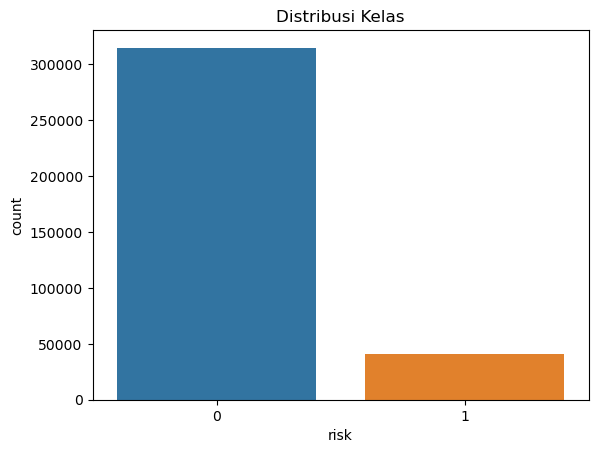

In [64]:
# Visualisasi dengan bar plot
sns.countplot(x=y_train, data=df_encoded)
plt.title('Distribusi Kelas')
plt.show()

In [65]:
from imblearn.over_sampling import SMOTE

# Menginisialisasi SMOTE
smote = SMOTE(random_state=42)

# Melakukan oversampling pada train set
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

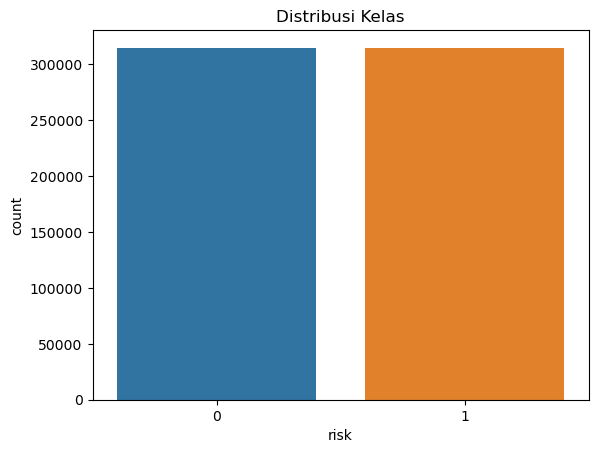

In [66]:
# Visualisasi dengan bar plot
sns.countplot(x=y_train_resampled, data=df_encoded)
plt.title('Distribusi Kelas')
plt.show()

## MODELING

### Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [68]:
# Inisialisasi model Logistic Regression
logreg = LogisticRegression(random_state=42)

# Melatih model dengan data pelatihan
logreg.fit(X_train_resampled, y_train_resampled)

C:\Users\sanny\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [69]:
# Melakukan prediksi pada data pengujian
y_pred = logreg.predict(X_test)

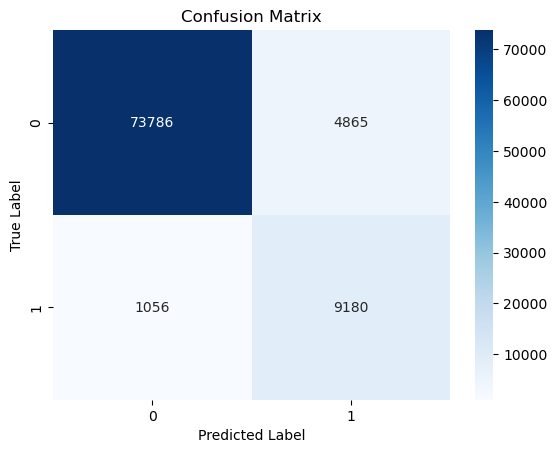

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96     78651
           1       0.65      0.90      0.76     10236

    accuracy                           0.93     88887
   macro avg       0.82      0.92      0.86     88887
weighted avg       0.95      0.93      0.94     88887

Accuracy: 0.9334
ROC-AUC Score: 0.9730


In [70]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score: {roc_auc:.4f}")

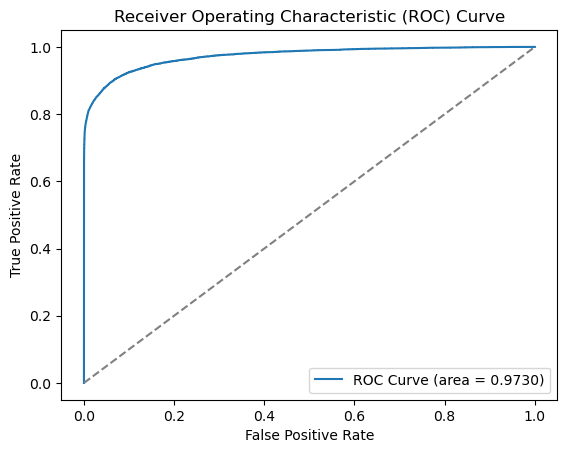

In [71]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
# Inisialisasi model
model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)

# Latih model
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [74]:
# Prediksi pada data uji
y_pred = y_pred = model.predict(X_test)

# Evaluasi model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[78523   128]
 [  863  9373]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     78651
           1       0.99      0.92      0.95     10236

    accuracy                           0.99     88887
   macro avg       0.99      0.96      0.97     88887
weighted avg       0.99      0.99      0.99     88887



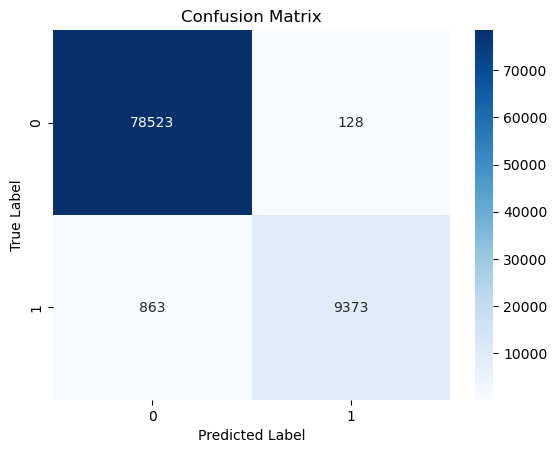

In [75]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [76]:
from sklearn.model_selection import cross_val_score
# 3. Inisialisasi model Random Forest dengan pengaturan untuk menangani overfitting
model = RandomForestClassifier(
    n_estimators=100,          # Jumlah pohon
    max_depth=10,              # Batasi kedalaman pohon
    min_samples_split=4,       # Jumlah minimum sampel untuk split
    min_samples_leaf=2,        # Jumlah minimum sampel per daun
    max_features='sqrt',       # Pengambilan sampel fitur
    random_state=42            # Untuk reproduktifitas hasil
)

# 4. Melatih model
model.fit(X_train_resampled, y_train_resampled)

# 5. Prediksi pada data uji
y_pred = model.predict(X_test)

# 6. Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Akurasi: {accuracy}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{cm}")

# 7. Cross-validation untuk memastikan tidak overfitting
cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean()}")

Akurasi: 0.9663280344707325
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     78651
           1       0.84      0.88      0.86     10236

    accuracy                           0.97     88887
   macro avg       0.91      0.93      0.92     88887
weighted avg       0.97      0.97      0.97     88887

Confusion Matrix:
[[76931  1720]
 [ 1273  8963]]
Cross-Validation Scores: [0.93959332 0.97418966 0.9770707  0.97463412 0.97673736]
Mean CV Accuracy: 0.9684450300009523


Interpretasi: Mean CV Accuracy 0.97 menunjukkan bahwa rata-rata model Anda memiliki akurasi 97% ketika diuji dengan data yang berbeda dalam proses cross-validation. Ini menunjukkan model Anda memiliki performa yang konsisten dan kemungkinan besar akan bekerja dengan baik pada data yang belum pernah dilihat sebelumnya.

## FEATURE IMPORTANCE

### Logistic Regression

In [77]:
# Melihat koeficient
coefficients = logreg.coef_[0]

# Menggabungkan koefisien dengan nama fitur
feature_importance = pd.Series(coefficients, index=X_train_resampled.columns)
feature_importance = feature_importance.sort_values(ascending=False)

print(feature_importance)

recoveries                             26.73
total_rec_int                          22.78
loan_amnt                              20.56
collection_recovery_fee                12.42
total_rec_late_fee                      5.16
inq_last_6mths                          3.66
bulan_last_pymnt_d                      2.87
initial_list_status_f                   2.54
home_ownership_OTHER                    2.38
initial_list_status_w                   1.97
grade_encode                            1.97
verification_status_Verified            1.66
verification_status_Not Verified        1.65
verification_status_Source Verified     1.29
revol_bal                               0.77
purpose_educational                     0.56
tot_cur_bal                             0.27
total_acc                               0.24
open_acc                                0.21
revol_util                              0.15
zip_code                                0.08
bulan_earliest_cr_line                  0.06
tanggal_is

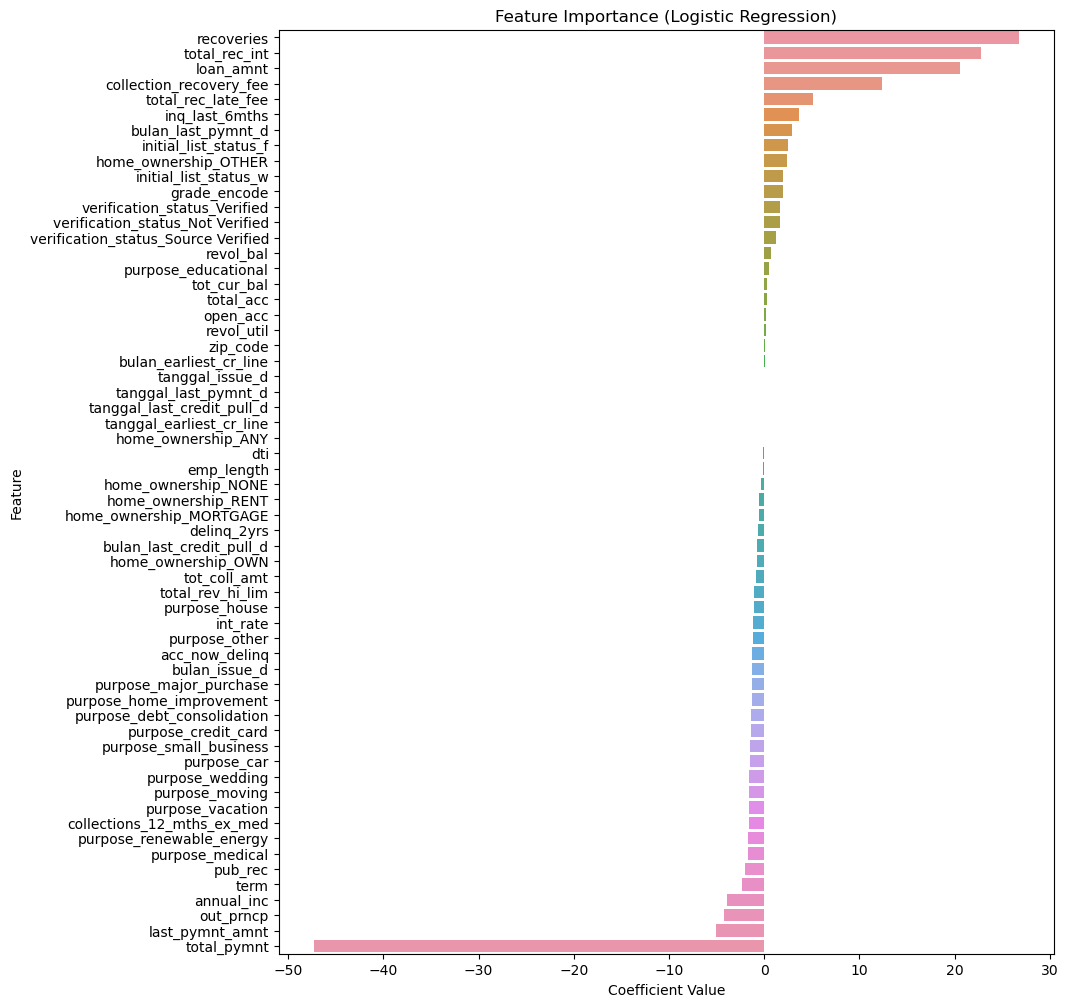

In [80]:
# Membuat visualisasi
plt.figure(figsize=(10, 12))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance (Logistic Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

### Random Forest

In [87]:
# Melihat koeficient
feature_importance_rf = pd.Series(model.feature_importances_, index=X_train_resampled.columns)

# Mengurutkan feature importance dari yang terbesar hingga terkecil
feature_importance_rf = feature_importance_rf.sort_values(ascending=False)

print(feature_importance_rf)

bulan_last_pymnt_d                    0.19
last_pymnt_amnt                       0.14
recoveries                            0.14
collection_recovery_fee               0.12
out_prncp                             0.09
total_pymnt                           0.06
grade_encode                          0.06
inq_last_6mths                        0.05
int_rate                              0.02
bulan_last_credit_pull_d              0.02
total_rec_late_fee                    0.02
loan_amnt                             0.01
pub_rec                               0.01
bulan_issue_d                         0.01
delinq_2yrs                           0.01
total_rec_int                         0.01
emp_length                            0.01
annual_inc                            0.00
bulan_earliest_cr_line                0.00
total_rev_hi_lim                      0.00
tot_cur_bal                           0.00
term                                  0.00
open_acc                              0.00
revol_util 

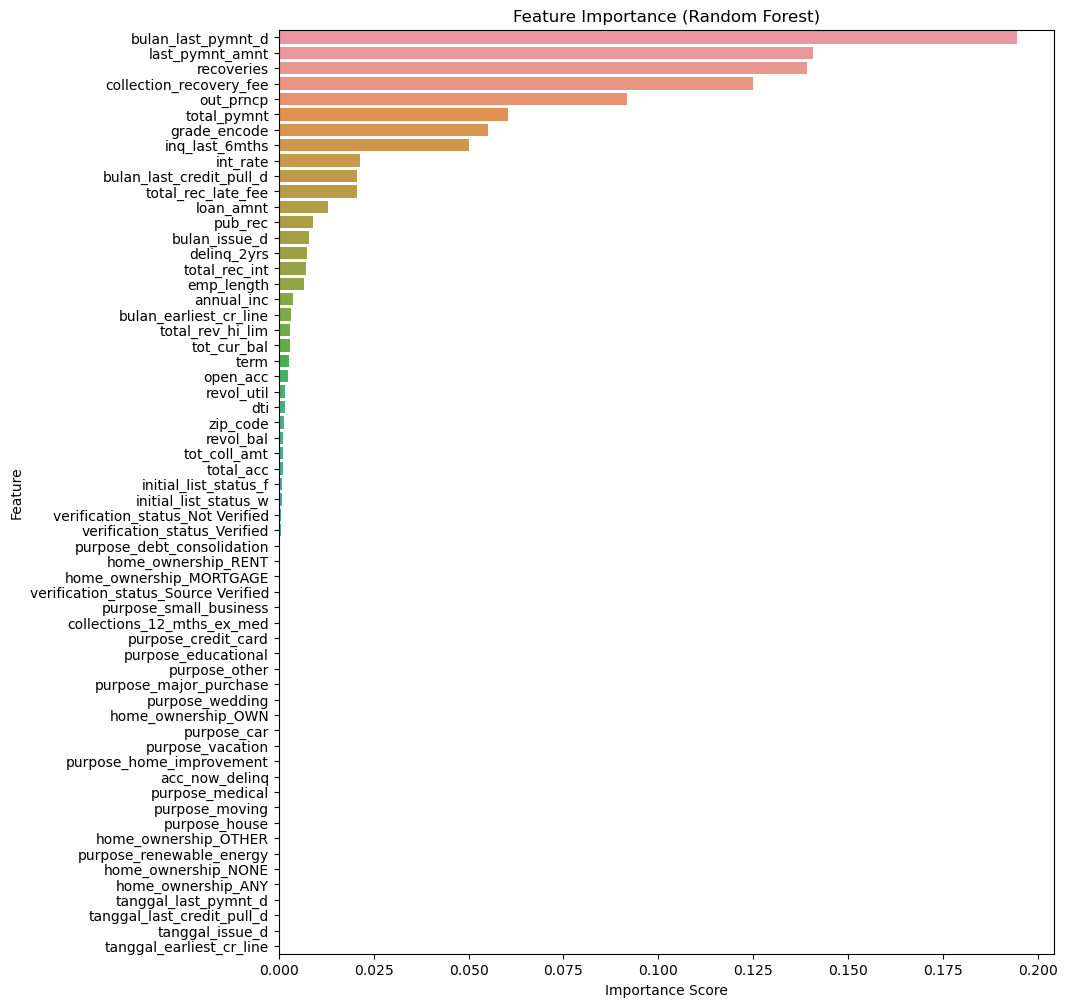

In [88]:
# Membuat visualisasi
plt.figure(figsize=(10, 12))
sns.barplot(x=feature_importance_rf, y=feature_importance_rf.index)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()